In [1]:
import jax
import matplotlib.pyplot as plt
from dynamics_discovery.data import TimeSeriesDataset
from dynamics_discovery.training import VanillaTrainer

In [19]:
dataset1, transform = (
    TimeSeriesDataset(
        *TimeSeriesDataset.from_hdf5("../../data/lorenz63_large.hdf5")[::100]
    )
    .downsample(2)
    .split_along_time(500)[0]
    .add_noise(0.0)
    .standardize()
)

In [20]:
dataset1.u.shape

(50, 500, 3)

In [21]:
dataset1.u.size

75000

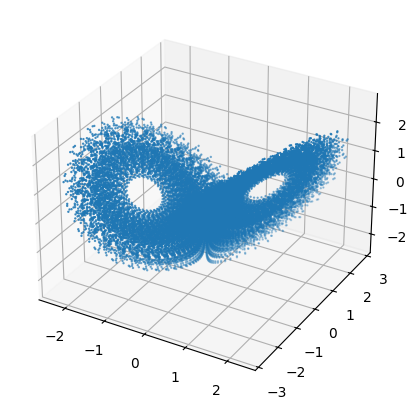

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), subplot_kw={"projection": "3d"})
ax.scatter(*dataset1.u.reshape(-1, 3).T, s=0.5)

In [13]:
dataset.u.shape

(5000, 250, 3)

In [4]:
sampler = RandomSegmentLoader(dataset, 2, 2048)
key = jax.random.PRNGKey(0)

state = sampler.init()
batch1, state = sampler.load_batch(state)
batch2, state = sampler.load_batch(state)
print(batch1[0])
print(batch2[0])

[[ 12.428681   12.872563 ]
 [ 94.54675    94.99064  ]
 [ 37.729927   38.17381  ]
 ...
 [103.86826   104.31215  ]
 [  2.2194073   2.6632888]
 [ 65.25058    65.69446  ]]
[[ 88.33241   88.7763  ]
 [108.75096  109.19485 ]
 [ 29.740059  30.18394 ]
 ...
 [107.8632   108.30708 ]
 [ 38.17381   38.617687]
 [ 54.15354   54.597424]]


In [4]:
import optax
from dynamics_discovery.models import NeuralODE


optimizer = optax.adabelief(learning_rate=1e-3)


trainer = VanillaTrainer(
    optimizer, max_epochs=10000, wandb_entity="jhko725", wandb_project="sampling_test"
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: Currently logged in as: jhko725 (jhelab) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [5]:
model = NeuralODE(3, 32, 3, rtol=1e-4, atol=1e-6)
loader = RandomSegmentLoader(dataset, 2, 2048)

trainer.train(model, loader)

step=0, loss=Array(1.0675566, dtype=float32)
step=1, loss=Array(1.0907297, dtype=float32)
step=2, loss=Array(1.0598106, dtype=float32)
step=3, loss=Array(1.0822732, dtype=float32)
step=4, loss=Array(1.0741649, dtype=float32)
step=5, loss=Array(1.072939, dtype=float32)
step=6, loss=Array(1.0669289, dtype=float32)
step=7, loss=Array(1.0762365, dtype=float32)
step=8, loss=Array(1.0852494, dtype=float32)
step=9, loss=Array(1.0623367, dtype=float32)
step=10, loss=Array(1.0588994, dtype=float32)
step=11, loss=Array(1.049999, dtype=float32)
step=12, loss=Array(1.0492213, dtype=float32)
step=13, loss=Array(1.0334382, dtype=float32)
step=14, loss=Array(1.0377474, dtype=float32)
step=15, loss=Array(0.9962235, dtype=float32)
step=16, loss=Array(0.98655254, dtype=float32)
step=17, loss=Array(1.0302081, dtype=float32)
step=18, loss=Array(1.0227075, dtype=float32)
step=19, loss=Array(1.0167322, dtype=float32)
step=20, loss=Array(1.0093125, dtype=float32)
step=21, loss=Array(1.0192692, dtype=float32)

Traceback (most recent call last):
  File "/tmp/ipykernel_797668/1577342263.py", line 70, in train
    loss, log_dict, model, loader_state, opt_state = _step_fn(
                                                     ^^^^^^^^^
  File "/home/jhko725/projects/sandbox/.venv/lib/python3.12/site-packages/equinox/_jit.py", line 275, in __call__
    return self._call(False, args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jhko725/projects/sandbox/.venv/lib/python3.12/site-packages/equinox/_module.py", line 1096, in __call__
    return self.__func__(self.__self__, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jhko725/projects/sandbox/.venv/lib/python3.12/site-packages/equinox/_jit.py", line 244, in _call
    marker, _, _ = out = self._cached(
                         ^^^^^^^^^^^^^
  File "/home/jhko725/projects/sandbox/.venv/lib/python3.12/site-packages/jax/_src/traceback_util.py", line 180, in reraise_with_filtered_traceback
    re

BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x15067afb4080>> (for post_run_cell), with arguments args (<ExecutionResult object at 15067a385730, execution_count=5 error_before_exec=None error_in_exec=[Errno 32] Broken pipe info=<ExecutionInfo object at 15067a385700, raw_cell="model = NeuralODE(3, 32, 3, rtol=1e-4, atol=1e-6)
.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://ssh-remote%2Bkias-lexicon-compute/home/jhko725/projects/sandbox/notebooks/datasets/datasets.ipynb#X13sdnNjb2RlLXJlbW90ZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe